### Exploratory factor analysis or EFA 
#### is a statistical technique used to reduce data to a smaller set of summary variables and to explore the underlying structure of a relatively large set of variables. It is used to identify the underlying relationships between measured variables. Each observed variable is considered as a potential measure of every factor, and the goal is to determine the strongest relationships.

#### Question:
Factor analysis is a useful technique to find latent factors that can potentially describe multiple
attributes, which is sometimes very useful for dimensionality reduction. Use the Airline
Passenger Satisfaction dataset to perform factor analysis. Choose the best features
possible that helps in dimensionality reduction, without much loss in information.

* Dataset - https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1- Loading Training Data Set

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

##### 1A -  Cleaning Training Dataset

In [4]:
df.drop(columns= ['Unnamed: 0'], inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


* Looking for missing values in the training dataset

In [5]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

- The only feature having missing values is "Arrival Delay in Minutes".
* No. of missing values is 310 out of 103904 which is merely 0.2 %.
* So it is safe to simply use the mean of that particular feature to fill in the missing values.

In [6]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace = True)

In [7]:
# Categorical Features

categorical_data = df.nunique()[df.nunique()<10]
categorical_data

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

In [8]:
# Non-Categorical Features

non_categorial_data = df.nunique()[df.nunique()>10].index
non_categorial_data = list(non_categorial_data)
non_categorial_data

['id',
 'Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

#### 2 - Loading Test Data

In [9]:
df_test = pd.read_csv('data/test.csv')
df_test.drop(['Unnamed: 0'], axis =1, inplace = True)

In [10]:
df_test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

##### 2A -  Cleaning Test Dataset

In [11]:
df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean(), inplace = True)

* So, ideally you must check if the TEST data's categorical features hold categories that the TRAIN data does not contain. In this case I know there isn't and so have not compared the two unique feature lists.

In [12]:
df.nunique()[df.nunique()<10]

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

#### 3 - Finding Outliers

* The boxplots help in visualizing the datapoints that don't necesarily fit in.
* You can see how each of the non categorical datapoints have a couple of datapoints that are true outliers.

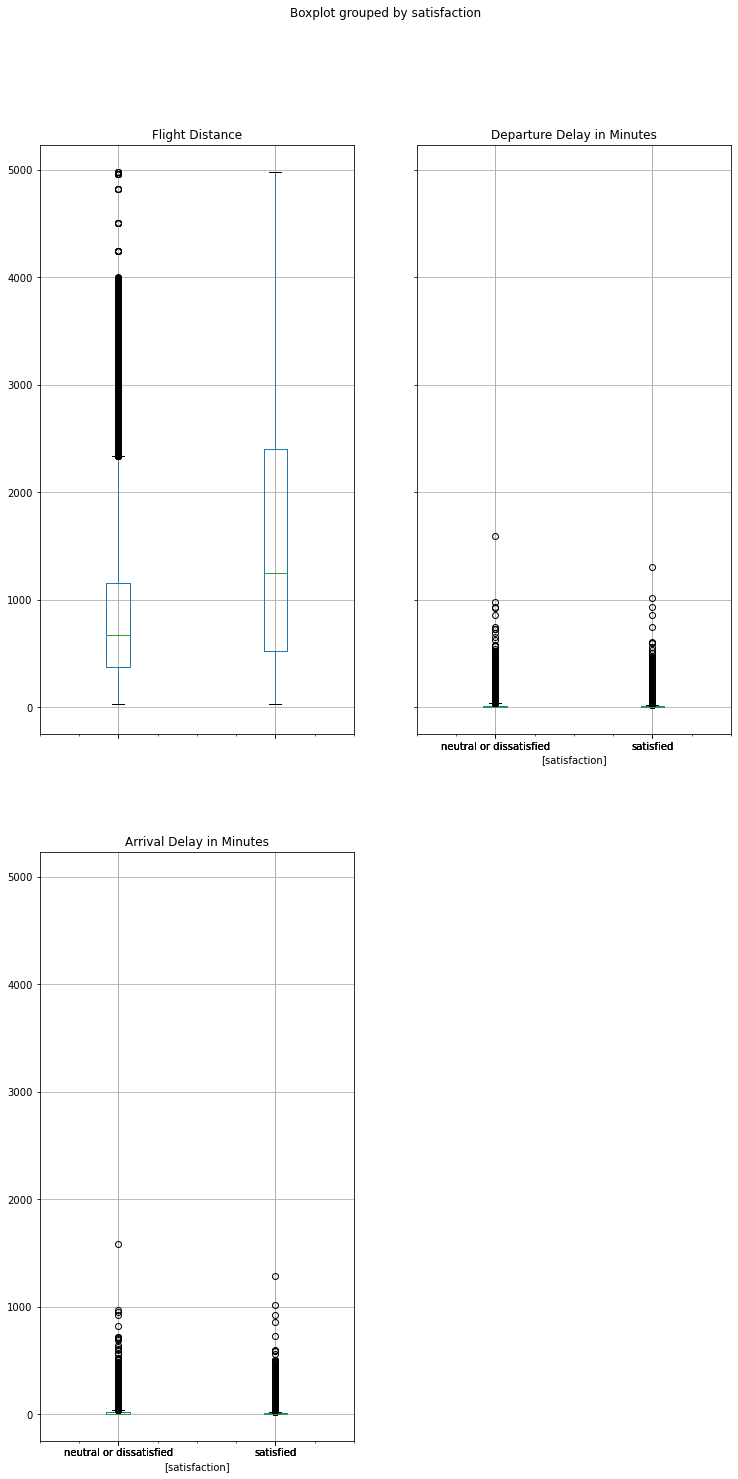

In [15]:
df.boxplot(column=non_categorial_data[2:], by=['satisfaction'], vert=True, figsize=(12,24));

* using the **Z-score** measure.
* 'The Z-score' is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [ ]:
from scipy import stats

df_copy = df.copy()
df_copy.drop(columns = list(categorical_data.index), inplace=True)
df_copy.drop(columns = ['id', 'Age'], inplace=True)
print(f"Finding the outliers in the foloowing features, {df_copy.columns}")

z = np.abs(stats.zscore(df_copy))
print(z.shape)
print(z)


In [17]:
# marking the threshold to the length of 3 standard deviation.

thres = 3
df_no = df[(z < thres).all(axis=1)]

In [ ]:
# Looking at the outlier datapoints

# outlier_data = df[(z > thres).any(axis=1)]

- The below boxplot shows that the concerned outliers have been dealt with.

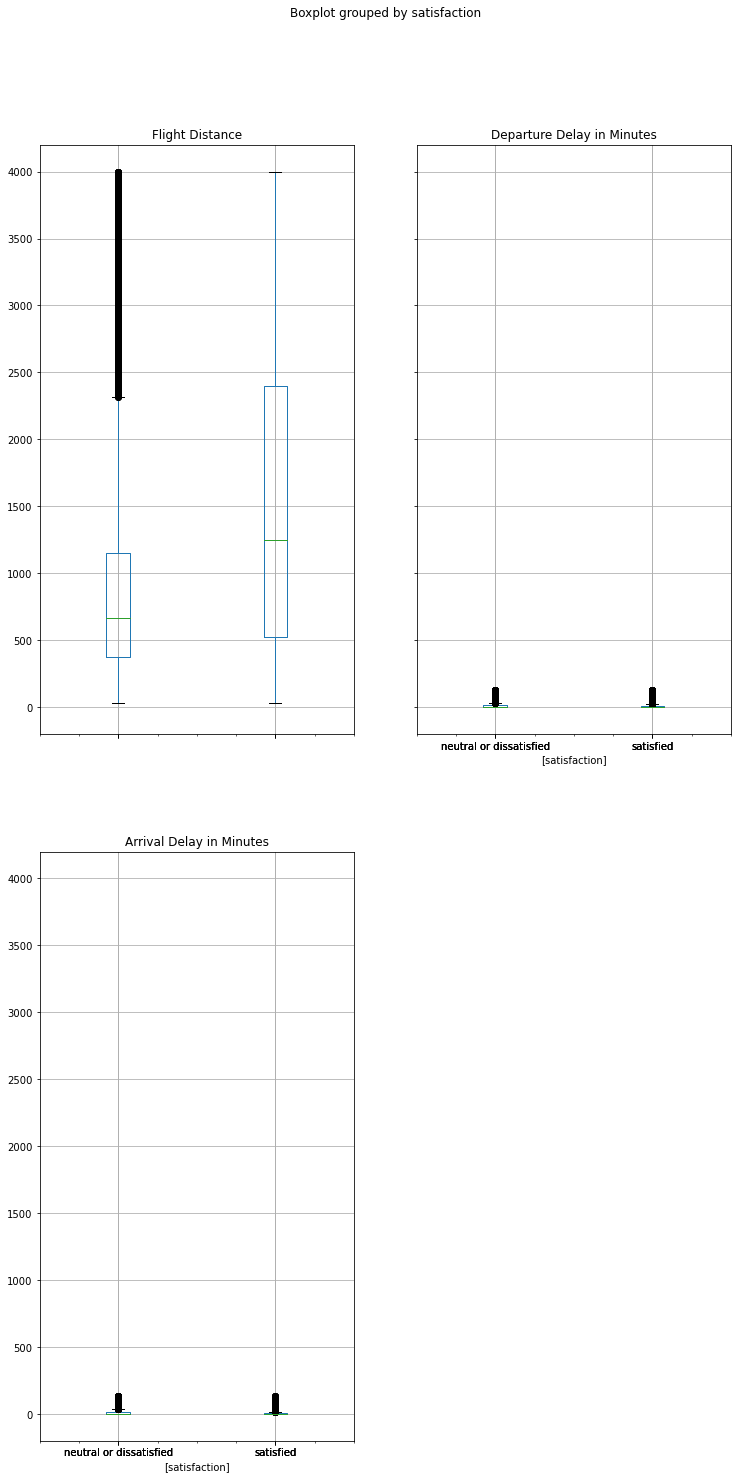

In [18]:
df_no.boxplot(column=non_categorial_data[2:], by=['satisfaction'], vert=True, figsize=(12,24));

In [69]:
print(f'No. of data points in the original dataset : {df.shape[0]}')
print(f"No. of outliers removed from orignal dataset : {df.shape[0]-df_no.shape[0]}")
print(f"Percentage of data dropped : {round((df.shape[0]-df_no.shape[0])/df.shape[0]*100, 2)} %")

No. of data points in the original dataset : 103904
No. of outliers removed from orignal dataset : 2546
Percentage of data dropped : 2.45 %


#### 4 - Ordinal Encoding the Non Numerical Data

In [21]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

In [22]:
categorical_data

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

- In the Training Data

In [23]:
df[categorical_data.index] = oe.fit_transform(df[categorical_data.index])
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,3,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,2,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,3,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,2,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,3,3,3,3,0,0.0,1


* In the Test Data

In [24]:
df_test[categorical_data.index] = oe.fit_transform(df_test[categorical_data.index])
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,0,52,0,1,160,5,4,3,...,5,5,5,4,1,5,5,50,44.0,1
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,3,2,4,5,0,0.0,1
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,2,1,2,2,0,0.0,0
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,0,2,1,4,0,6.0,1
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,1,3,2,4,0,20.0,1


#### 5A - Seperating the Test Data set into Features (X_test) and Target (y_test)

In [44]:
X_test = df_test.drop(['satisfaction'], axis=1).values
y_test = df_test['satisfaction'].values

#### 5B - Seperating the Training Data set into Features (X_train) and Target (y_train)

In [26]:
X_train = df.drop(['satisfaction'], axis =1).values
y_train = df['satisfaction'].values
X_train_mean = np.mean(X_train,axis=0)
X_train_n = X_train - np.matrix(X_train_mean)
X_train_n = X_train_n.T ## Converts row vectors to column vectors
print(X_train_n.shape)
print(y_train.shape)

(23, 103904)
(103904,)


In [27]:
C1 = np.cov(X_train_n)
C2 = np.corrcoef(X_train_n)## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))
eig_val,eig_vec = np.linalg.eig(C1)

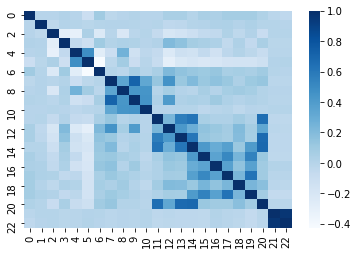

In [28]:
ax = sns.heatmap(C2,cmap='Blues')

In [29]:
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

eig_vec_ls = []
eig_val_ls = []


# Picking out the top "7" eigen vectors that have the highest eigen values.
imp_vec = arg_sort[:7]
for i in imp_vec:
    e_1 = eig_vec[:,i]
    lambda_1 = eig_val[i]
    eig_vec_ls.append(e_1)
    eig_val_ls.append(lambda_1)

In [30]:
eig_val_arr  = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)

In [31]:
var_ls = []
X_train_var = np.var(X_train_n,axis=1)
X_train_var = np.ravel(X_train_var)

for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = X_train_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)
S.shape

(23, 23)

In [32]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)

(7, 23)


In [110]:
z = W@X_train_n
z1 = z.T
z1.shape

(103904, 7)

#### Using the Libraries

In [88]:
from sklearn.decomposition import FactorAnalysis

# X_train
transformer = FactorAnalysis(n_components=7, random_state=0)
X_train_transformed = transformer.fit_transform(X_train)

# X_test
transformer = FactorAnalysis(n_components=7, random_state=0)
X_test_transformed = transformer.fit_transform(X_test)
X_train_transformed.shape, X_test_transformed.shape


((103904, 7), (25976, 7))

##### Standardizing

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transf_scaled = scaler.fit_transform(X_train_transformed)
scaler = StandardScaler()
X_test_transf_scaled = scaler.fit_transform(X_test_transformed)


#### Trying different Classifiers
**1. LinearSVC**

    - before EFA

In [108]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter = 10000)
model.fit(X_train, y_train)

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=10000)

In [109]:
model.score(X_test, y_test)

0.5965121650754542

    - after EFA

In [92]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter = 10000)
model.fit(X_train_transf_scaled, y_train)

I:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=10000)

In [93]:
model.score(X_test_transf_scaled, y_test)

0.7544656606097937

**2. Knearest NEighbours**

 - before EFA

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', n_jobs=-1)
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [95]:
model2.score(X_test, y_test)

0.6760856174930705

    - after EFA

In [96]:
model2 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', n_jobs=-1)
model2.fit(X_train_transf_scaled, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [97]:
model2.score(X_test_transf_scaled, y_test)

0.8036264243917463

**3. SVC**

    - before EFA

In [98]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [99]:
model3.score(X_test, y_test)

0.6493686479827533

    - after EFA

In [100]:
model3 = SVC()
model3.fit(X_train_transf_scaled, y_train)

SVC()

In [101]:
model3.score(X_test_transf_scaled, y_test)

0.8179858330766862

**4. RandomForestClassifier**

    - before EFA

In [102]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [103]:
model4.score(X_test, y_test)

0.94876039421004

    - after EFA

In [104]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train_transf_scaled, y_train)

RandomForestClassifier(random_state=0)

In [105]:
model4.score(X_test_transf_scaled, y_test)

0.8367339082229751